## Partie 2 : Travail d'analyse

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import scipy
from math import exp, sqrt, pi
from scipy import stats
from scipy.stats import chi2_contingency, pearsonr, spearmanr

In [6]:
complete = pd.read_csv('complete.csv')
complete = complete.drop(columns = complete.columns[0], axis=1)
complete.head()

id_prod  price  categ session_id client_id sex  birth        date      time
0  0_1421  19.99    0.0   s_168213    c_6389   f   1991  20/02/2022  17:04:37
1  0_1421  19.99    0.0   s_285450    c_6389   f   1991  20/10/2022  17:04:37
2  0_2131   8.99    0.0   s_102458    c_6389   f   1991  09/10/2021  21:47:06
3  0_1635  16.99    0.0    s_26841    c_6389   f   1991  28/04/2021  06:08:38
4   0_166   1.83    0.0    s_62585    c_6389   f   1991  15/07/2021  10:35:31

In [7]:
# Nous ajoutons une colonne 'age' pour la suite de nos analyses

complete['age'] = complete['birth'].apply(lambda x: (datetime.datetime.now().year - x))
complete.head()

id_prod  price  categ session_id client_id sex  birth        date      time  \
0  0_1421  19.99    0.0   s_168213    c_6389   f   1991  20/02/2022  17:04:37   
1  0_1421  19.99    0.0   s_285450    c_6389   f   1991  20/10/2022  17:04:37   
2  0_2131   8.99    0.0   s_102458    c_6389   f   1991  09/10/2021  21:47:06   
3  0_1635  16.99    0.0    s_26841    c_6389   f   1991  28/04/2021  06:08:38   
4   0_166   1.83    0.0    s_62585    c_6389   f   1991  15/07/2021  10:35:31   

   age  
0   32  
1   32  
2   32  
3   32  
4   32

**Réponse aux demandes d'analyses d'Antoine et Julie**

In [8]:
# Nous allons étudier l'évolution du chiffre d'affaires dans le temps

info_CA = complete[['price', 'date']]
info_CA.loc[:, 'n_date'] = pd.to_datetime(info_CA['date'])
info_CA = info_CA.drop(['date'], axis=1)
info_CA = info_CA.sort_values(by='n_date', ascending=True)
info_CA.loc[:, 'year'] = info_CA['n_date'].dt.year
info_CA.loc[:, 'month'] = info_CA['n_date'].dt.month
info_CA.loc[:, 'day'] = info_CA['n_date'].dt.day
info_CA.head()

/usr/lib/python3/dist-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


price     n_date  year  month  day
292839  10.70 2021-01-03  2021      1    3
534633  15.63 2021-01-03  2021      1    3
195380  24.67 2021-01-03  2021      1    3
500140  10.86 2021-01-03  2021      1    3
303013   8.99 2021-01-03  2021      1    3

In [9]:
# Nous additions les prix par mois pour ensuite grouper ces chiffres par an

CA_mois = info_CA.groupby([(info_CA.year), (info_CA.month)]).sum()
CA_mois = CA_mois.drop(['day', 'year', 'month'], axis=1)

CA_mois.head(36)

price
year month           
2021 1      163003.22
     2      154934.02
     3      446749.44
     4      436632.78
     5      453890.54
     6      444736.34
     7      448287.03
     8      455643.29
     9      467227.23
     10     353807.87
     11     467694.96
     12     478219.84
2022 1      521048.06
     2      512150.04
     3      510718.30
     4      498000.07
     5      523778.68
     6      503168.44
     7      520424.71
     8      507060.93
     9      494444.12
     10     521790.91
     11     492342.24
     12     503755.31
2023 1      347800.10
     2      298638.08
     3       32956.38
     4       31782.99
     5       32584.27
     6       29375.54
     7       33343.93
     8       34781.95
     9       34499.94
     10      30256.33
     11      33373.06
     12      34827.74

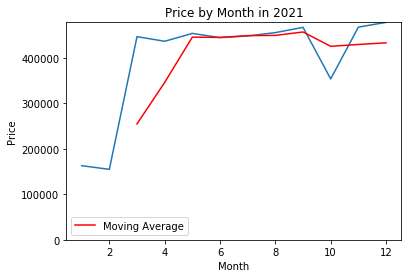

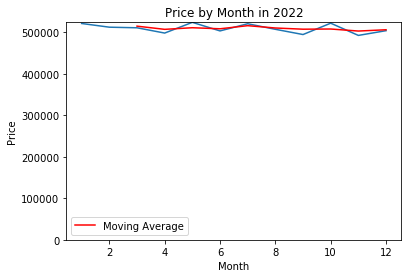

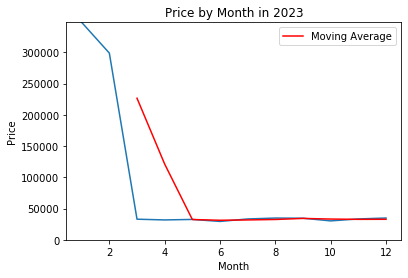

In [10]:
# Nous analysons l'évolution du chiffre d'affaires par année
# Ainsi que la moyenne mobile (sur 3 mois)

df = CA_mois

df_2021 = df.loc[2021]
df_2021['Moving Average'] = df_2021['price'].rolling(3).mean()

plt.plot(df_2021.index, df_2021['price'])
plt.plot(df_2021.index, df_2021['Moving Average'], label='Moving Average', color='red')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Price by Month in 2021')
plt.legend()
plt.ylim(0, max(df_2021['price']))
plt.show()

df_2022 = df.loc[2022]
df_2022['Moving Average'] = df_2022['price'].rolling(3).mean()

plt.plot(df_2022.index, df_2022['price'])
plt.plot(df_2022.index, df_2022['Moving Average'], label='Moving Average', color='red')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Price by Month in 2022')
plt.legend()
plt.ylim(0, max(df_2022['price']))
plt.show()

df_2023 = df.loc[2023]
df_2023['Moving Average'] = df_2023['price'].rolling(3).mean()

plt.plot(df_2023.index, df_2023['price'])
plt.plot(df_2023.index, df_2023['Moving Average'], label='Moving Average', color='red')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Price by Month in 2023')
plt.legend()
plt.ylim(0, max(df_2023['price']))
plt.show()

L'évolution du chiffre d'affaire pour l'entreprise Lapage est très positive entre le début de l'année 2021 
(de 160 000€ à 480 000€) et 2022, année pendant laquelle, ce chiffre d'affaire se stabilise autour
des 510 000€ par mois.  
Ce chiffre d'affaire marque ensuite une baisse significative pour l'année 2023 qui ne présage rien de bon pour l'entreprise si la tendance se confirme (de 510 000€/mois à 325 000€/mois, baisse de 36%).  
A noter, une baisse du CA lors du mois de octobre 2021.

Valeurs anormales :
    date     price
0      1  17058.34
27    28  14758.42
28    29  16453.63
29    30  15386.78
30    31  16405.12


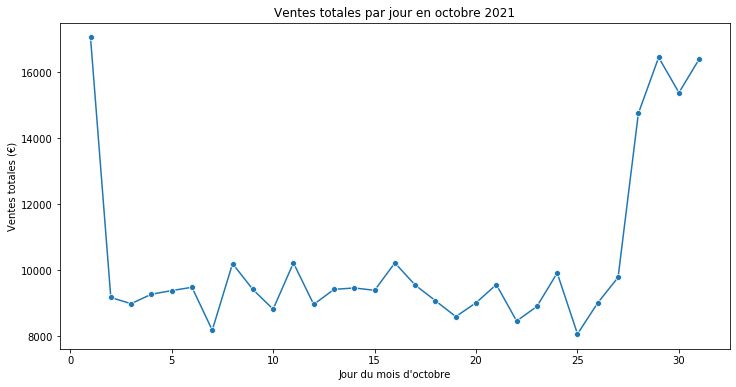

In [11]:
df = complete

# Convertir la colonne 'date' au format datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Filtrer les données pour le mois d'octobre 2021
df_october = df[(df['date'].dt.month == 10) & (df['date'].dt.year == 2021)]

# Grouper les données par jour et calculer la somme des ventes
daily_sales = df_october.groupby(df_october['date'].dt.day)['price'].sum().reset_index()

# Créer le graphique
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='price', data=daily_sales, marker='o')
plt.xlabel('Jour du mois d\'octobre')
plt.ylabel('Ventes totales (€)')
plt.title('Ventes totales par jour en octobre 2021')

# Afficher les valeurs anormales
Q1 = daily_sales['price'].quantile(0.25)
Q3 = daily_sales['price'].quantile(0.75)
IQR = Q3 - Q1

outliers = daily_sales[(daily_sales['price'] < (Q1 - 1.5 * IQR)) | (daily_sales['price'] > (Q3 + 1.5 * IQR))]
print("Valeurs anormales :")
print(outliers)

# Afficher le graphique
plt.show()

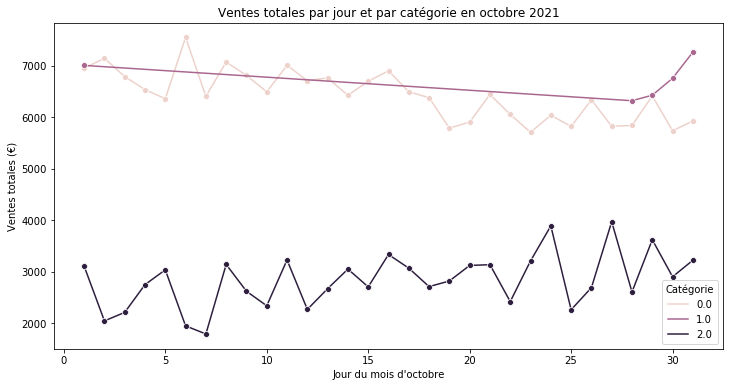

In [12]:
# Analysons les ventes de chaque catégorie de livres sur cette période

# Grouper les données par jour et catégorie, puis calculer la somme des ventes
daily_sales = df_october.groupby([df_october['date'].dt.day, 'categ'])['price'].sum().reset_index()

# Créer le graphique
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='price', hue='categ', data=daily_sales, marker='o')
plt.xlabel('Jour du mois d\'octobre')
plt.ylabel('Ventes totales (€)')
plt.title('Ventes totales par jour et par catégorie en octobre 2021')
plt.legend(title='Catégorie')

# Afficher le graphique
plt.show()

La baisse du chiffre d'affaires en Octobre 2021 pour s'expliquer par l'absence de ventes de livres de catégorie 1.0 entre le début (le 1er octobre) et la fin du mois (le 28 octobre). Cela pourrait être dû à une rupture de stock ou un soucis informatique sur la plateforme.

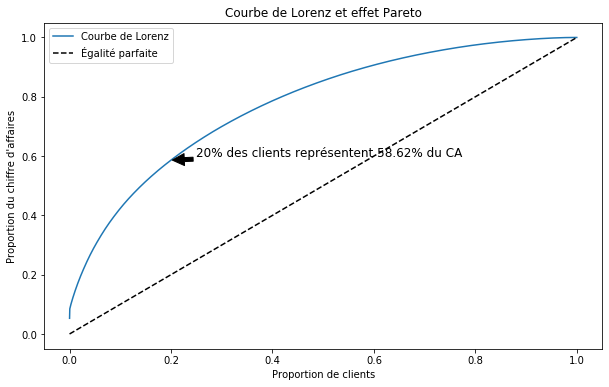

In [13]:
# Analysons la répartition du chiffre d'affaires entre tous les clients à l'aide d'une courbe de Lorenz

df = complete

# Créer une nouvelle colonne 'revenue' 

df['revenue'] = df['price'] * df['categ']

# Calculer le CA par clients 

clients_revenue = df.groupby('client_id')['revenue'].sum().reset_index()

# Trier les clients par chiffre d'affaires décroissant et calculer les pourcentages cumulés

clients_revenue_sorted = clients_revenue.sort_values(by='revenue', ascending=False).reset_index(drop=True)
clients_revenue_sorted['cumulative_revenue'] = clients_revenue_sorted['revenue'].cumsum()
clients_revenue_sorted['cumulative_percentage'] = 100 * clients_revenue_sorted['cumulative_revenue'] / clients_revenue_sorted['revenue'].sum()

# Créer la courbe de Lorenz et regarder l'effet Pareto

fig, ax = plt.subplots(figsize=(10, 6))

# Courbe de Lorenz
ax.plot(np.arange(len(clients_revenue_sorted)) / len(clients_revenue_sorted),
        clients_revenue_sorted['cumulative_percentage'] / 100,
        label='Courbe de Lorenz')

# Ligne diagonale (égalité parfaite)
ax.plot([0, 1], [0, 1], color='k', linestyle='--', label='Égalité parfaite')

# Effet Pareto (80/20)
pareto_20 = int(0.2 * len(clients_revenue_sorted))
pareto_80 = clients_revenue_sorted.loc[pareto_20 - 1, 'cumulative_percentage']
ax.annotate(f"20% des clients représentent {pareto_80:.2f}% du CA",
            xy=(0.2, pareto_80 / 100),
            xytext=(0.25, 0.6),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=12)

ax.set_xlabel("Proportion de clients")
ax.set_ylabel("Proportion du chiffre d'affaires")
ax.set_title("Courbe de Lorenz et effet Pareto")
ax.legend()

plt.show()

Dans ce contexte, l'effet Pareto met en évidence qu'une proportion relativement faible de clients (20 %) génère une part importante du chiffre d'affaires (presque 60% du CA). Il est donc important de pouvoir conserver cette base solide de clients en leur proposant des avatanges afin de les fidéliser un maximum.

In [14]:
# Analysons le profil des 10 meilleurs clients et la répartition de leurs achats dans les différentes catégories

df = complete

# Grouper les données par client_id et calculer la somme du prix
client_sales = df.groupby('client_id')['price'].sum().reset_index()

# Trier les données par chiffre d'affaires décroissant et sélectionner les 10 premières lignes
top_clients = client_sales.sort_values(by='price', ascending=False).head(10)

# Afficher le premier tableau
print("Top 10 clients:")
print(top_clients.to_string(index=False))

# Grouper les données par client_id et catégorie, puis calculer la somme du prix
client_sales_categ = df.groupby(['client_id', 'categ'])['price'].sum().reset_index()

# Filtrer pour inclure uniquement les 10 meilleurs clients
client_sales_categ_top = client_sales_categ[client_sales_categ['client_id'].isin(top_clients['client_id'])]

# Pivoter le DataFrame pour avoir les catégories en colonnes et les clients en index
client_sales_categ_pivot = client_sales_categ_top.pivot_table(index='client_id', columns='categ', values='price', fill_value=0)

# Afficher le deuxième tableau
print("\nRépartition des achats des 10 meilleurs clients par catégorie:")
print(client_sales_categ_pivot)

Top 10 clients:
client_id      price
   c_1609  324033.35
   c_4958  289760.34
   c_6714  153598.92
   c_3454  113637.93
   c_3263    5276.87
   c_1570    5271.62
   c_2899    5214.05
   c_2140    5208.82
   c_7319    5155.77
   c_7959    5085.45

Répartition des achats des 10 meilleurs clients par catégorie:
categ            0.0        1.0        2.0
client_id                                 
c_1570       2812.80    2312.83     145.99
c_1609     214447.24  108084.90    1501.21
c_2140       3360.28    1702.55     145.99
c_2899         25.38     779.01    4409.66
c_3263       3399.29    1877.58       0.00
c_3454      28779.69   83583.02    1275.22
c_4958         48.76   39375.24  250336.34
c_6714      57254.59   73246.54   23097.79
c_7319       2936.17    2175.61      43.99
c_7959       3467.40    1618.05       0.00


<Figure size 864x432 with 0 Axes>

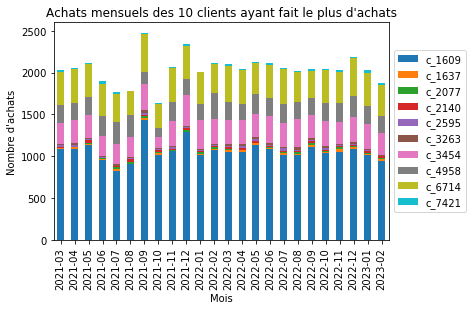

In [15]:
# Analysons les achats dans le temps des 10 clients ayant dépensés le plus

df = complete

# Compter le nombre d'achats par client
clients_counts = df['client_id'].value_counts().nlargest(10)

# Filtrer les données pour conserver uniquement les 10 clients ayant effectué le plus d'achats
top_clients = df[df['client_id'].isin(clients_counts.index)].copy()

# Convertir la colonne 'date' en datetime
top_clients['date'] = pd.to_datetime(top_clients['date'], format='%d/%m/%Y')

# Grouper les données par client et par mois
monthly_data = top_clients.groupby(['client_id', top_clients['date'].dt.to_period('M')]).size().unstack(level=0).fillna(0)

# Afficher le graphique
plt.figure(figsize=(12, 6))
ax = monthly_data.plot(kind='bar', stacked=True)
plt.title('Achats mensuels des 10 clients ayant fait le plus d\'achats')
plt.xlabel('Mois')
plt.ylabel('Nombre d\'achats')

# Déplacer la légende à droite du graphique
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


Cette analyse et ce graphique permettent de mettre en avant les 4 plus gros clients (en volume de livres achetés) de la boutique Lapage. Il est donc important pour la plateforme de garder ces clients, peut-être en le proposant un service très personnalisé.

In [16]:
# Analysons les livres les plus vendus par catégorie 

df = complete

# Compter le nombre de ventes par produit et catégorie
product_sales = df.groupby(['id_prod', 'categ']).size().reset_index(name='count')

# Trouver les produits les plus vendus par catégorie
top_products = product_sales.loc[product_sales.groupby('categ')['count'].idxmax()]

# Trouver les produits les moins vendus par catégorie
bottom_products = product_sales.loc[product_sales.groupby('categ')['count'].idxmin()]

# Afficher les tableaux
print("Produits les plus vendus par catégorie :")
print(top_products)
print("\nProduits les moins vendus par catégorie :")
print(bottom_products)

Produits les plus vendus par catégorie :
     id_prod  categ  count
466   0_1422    0.0   1292
2591   1_369    1.0   2252
3034   2_102    2.0   1027

Produits les moins vendus par catégorie :
     id_prod  categ  count
166   0_1151    0.0      1
2628   1_402    1.0      2
3175    2_23    2.0      1


Produits les plus vendus par catégorie avec le prix total des ventes :
  id_prod  categ  count  total_price
0  0_1422    0.0   1292     14741.72
1   1_369    1.0   2252     54025.48
2   2_102    2.0   1027     60736.78


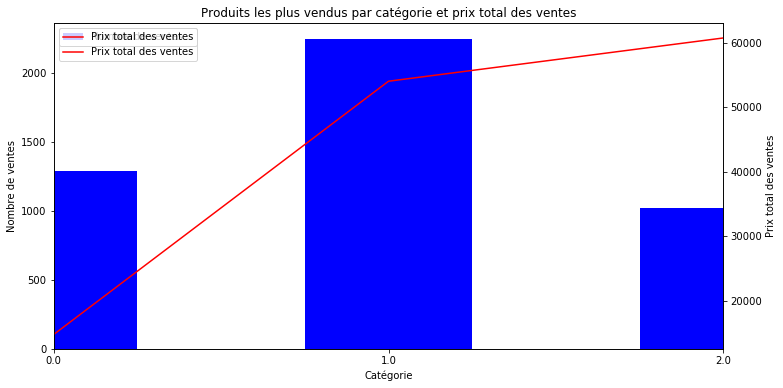

In [17]:
df = complete

# Calculer le prix total des ventes pour chaque produit
total_sales = df.groupby(['id_prod', 'categ'])['price'].sum().reset_index(name='total_price')

# Fusionner les informations de prix total avec les produits les plus vendus
top_products = top_products.merge(total_sales, on=['id_prod', 'categ'])

# Afficher le tableau des produits les plus vendus avec le prix total des ventes
print("Produits les plus vendus par catégorie avec le prix total des ventes :")
print(top_products)

# Créer un graphique pour les produits les plus vendus et le prix total des ventes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Graphique des produits les plus vendus
top_products.plot(kind='bar', x='categ', y='count', ax=ax1, color='b', label='Nombre de ventes')
ax1.set_title('Produits les plus vendus par catégorie et prix total des ventes')
ax1.set_xlabel('Catégorie')
ax1.set_ylabel('Nombre de ventes')
ax1.set_xticklabels(['0.0', '1.0', '2.0'], rotation=0)

# Créer un deuxième axe pour le prix total des ventes
ax2 = ax1.twinx()

# Graphique du prix total des ventes
top_products.plot(kind='line', x='categ', y='total_price', ax=ax2, color='r', label='Prix total des ventes')
ax2.set_ylabel('Prix total des ventes')

# Fusionner les légendes des deux axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

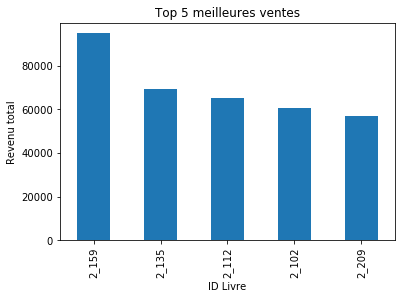

In [18]:
# Mettons en avant les 5 meilleures ventes de la librairie Lapage

sales_data = complete.groupby('id_prod')['price'].sum()

best_selling = sales_data.sort_values(ascending=False)
top_5_best_selling = best_selling.head()
top_5_best_selling.plot(kind='bar')

plt.title('Top 5 meilleures ventes')
plt.xlabel('ID Livre')
plt.ylabel('Revenu total')

plt.show()

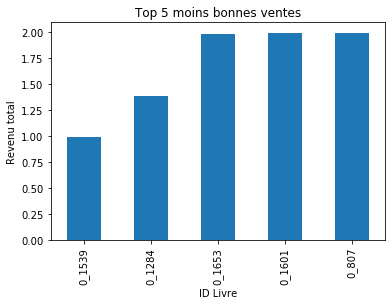

In [19]:
# Mettons en avant les 5 pires ventes de la librairie Lapage

worst_selling = sales_data.sort_values(ascending=True)
top_5_worst_selling = worst_selling.head()
top_5_worst_selling.plot(kind='bar')

plt.title('Top 5 moins bonnes ventes')
plt.xlabel('ID Livre')
plt.ylabel('Revenu total')

plt.show()

Nous pouvons donc constater que les livres de la catégorie 2.0 sont vendus plus chers que les livres des 2 autres catégories (0 et 1). Cela pourrait être intéressant de proposer des promotions afin de vendre dans un plus grand volume les livres de catégories 2.

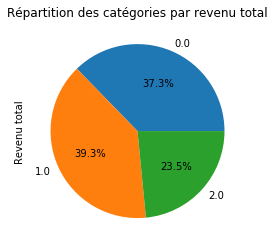

In [20]:
# Nous regardons ici la répartition par catégorie en fonction du revenu total généré

category_data = complete.groupby('categ')['price'].sum()
category_data.plot(kind='pie',autopct='%1.1f%%')
plt.title('Répartition des catégories par revenu total')

plt.ylabel('Revenu total')
plt.show()

Text(0, 0.5, 'Revenu total')

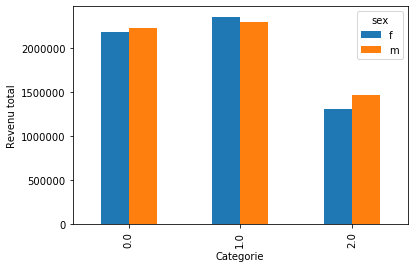

In [21]:
# Nous regardons ici la répartition des ventes totales par sexe et catégorie

pivot_table = pd.pivot_table(complete, values='price', index=['categ'], columns=['sex'], aggfunc=np.sum)

pivot_table.plot(kind='bar')
plt.xlabel("Categorie")
plt.ylabel("Revenu total")

La catégorie 2.0 est la catégorie qui a ramené le moins de revenu. Il serait intéressant que cette catégorie soit mise en avant afin qu'elle génère autant de revenus que les deux autres catégories et donc qu'elle booste le CA global de l'entreprise.  
Nous ne remarquons pas de disparité particulière entre le CA généré par les achats de livres faits par femmes ou des hommes.

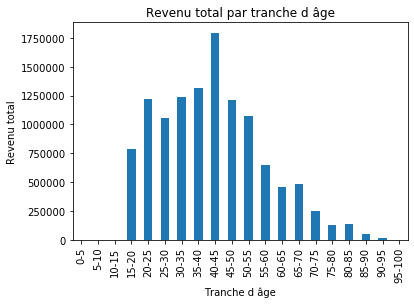

In [22]:
# Nous allons regarder la répartition du revenu total par tranche d'âge 
# présenter l'information avec une pyramide des ages par sexe

complete['age_group'] = pd.cut(complete['age'], bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100], labels = ['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','65-70','70-75','75-80','80-85','85-90','90-95','95-100'])
age_group_sales = complete.groupby('age_group')['price'].sum()
age_group_sales.plot(kind='bar')
plt.title('Revenu total par tranche d âge')
plt.xlabel('Tranche d âge')
plt.ylabel('Revenu total')
plt.show()

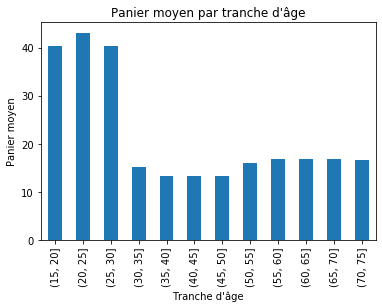

In [23]:
# Nous analysons les dépenses des clients
# Le panier moyen par tranche d'âge

df = complete

age_group = df.groupby(pd.cut(df["age"], range(15, 80, 5)))

average_basket = age_group["price"].mean()

average_basket.plot(kind="bar")
plt.xlabel("Tranche d'âge")
plt.ylabel("Panier moyen")
plt.title("Panier moyen par tranche d'âge")
plt.show()

Nous remarquons que les 40-45 ans sont les clients ayant générés le plus de chiffres d'affaires en ayant un des paniers moyens les plus faibles.  
On peut en conclure que ce sont nos clients les plus fidèles et les plus réguliers. 
L'accès aux technologies et à internet n'étant pas évident pour les personnes agées, ces catégories d'age seront difficiles à convaincre d'acheter.

## Tests Statistiques

4 tests statistiques vont être effectués pour répondre aux demandes. Il faudra donc regarder plus précisément :

    - Le lien entre l'âge et le montant total des achats
    - Le lien entre l'âge et la fréquence d'achats
    - Le lien entre l'âge et la taille du panier moyen
    - Le lien entre l'âge et la catégorie de livres achetés

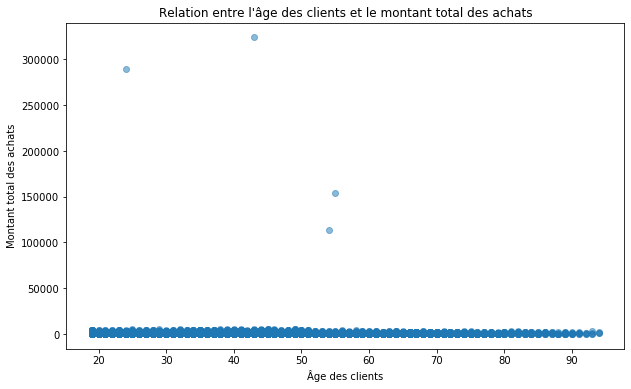

In [24]:
# Observons le lien entre l'âge des clients et le montant total des achats

df = complete

# Calcul du revenue par client en fonction de leur âge
clients_revenue_age = df.groupby('client_id').agg({'price': 'sum', 'age': 'first'}).reset_index()

# Création du graphique en nuage de points
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(clients_revenue_age['age'], clients_revenue_age['price'], alpha=0.5)

ax.set_xlabel("Âge des clients")
ax.set_ylabel("Montant total des achats")
ax.set_title("Relation entre l'âge des clients et le montant total des achats")

plt.show()

Sur ce graphique, avec des valeurs très élevées (4 points), il est difficile d'observer le lien entre l'âge et le montant total des achats.

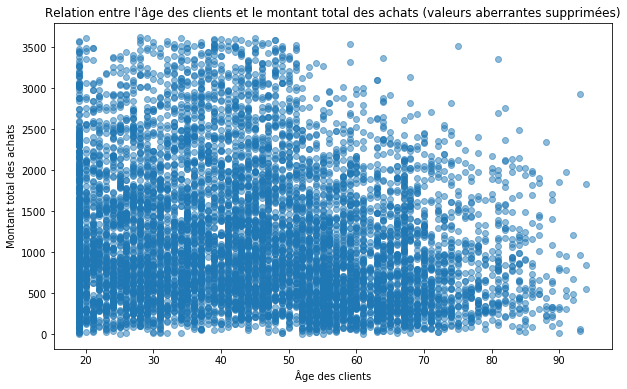

In [25]:
df = complete

# Calcul du revenue par client en fonction de leur âge
clients_revenue_age = df.groupby('client_id').agg({'price': 'sum', 'age': 'first'}).reset_index()

# Calcul des statistiques descriptives pour le montant total des achats
revenue_desc = clients_revenue_age['price'].describe()

# Calcul de l'IQR (écart interquartile)
IQR = revenue_desc['75%'] - revenue_desc['25%']

# Définition des bornes inférieure et supérieure pour les valeurs aberrantes
lower_bound = revenue_desc['25%'] - 1.5 * IQR
upper_bound = revenue_desc['75%'] + 1.5 * IQR

# Suppression des valeurs aberrantes
clients_revenue_age_filtered = clients_revenue_age[(clients_revenue_age['price'] >= lower_bound) & (clients_revenue_age['price'] <= upper_bound)]

# Création du graphique en nuage de points avec les données filtrées
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(clients_revenue_age_filtered['age'], clients_revenue_age_filtered['price'], alpha=0.5)

ax.set_xlabel("Âge des clients")
ax.set_ylabel("Montant total des achats")
ax.set_title("Relation entre l'âge des clients et le montant total des achats (valeurs aberrantes supprimées)")

plt.show()

La forme que prend les points de ce graphique ne montre pas de relation linéaire entre ces 2 variables.

In [26]:
# Testons la distribution des variables : âge et montant total des achats pour identifier le test à réaliser
# Si la distribution des 2 variables est normale, nous effectuerons un Test de Pearson
# Sinon, un test de Spearman sera fait.

df = complete

# Calcul du revenue par client en fonction de leur âge
clients_revenue_age = df.groupby('client_id').agg({'price': 'sum', 'age': 'first'}).reset_index()

# Normalisation des variables d'intérêt (âge et montant total des achats) en utilisant la méthode z-score
age_normalized = stats.zscore(clients_revenue_age['age'])
revenue_normalized = stats.zscore(clients_revenue_age['price'])

# Application du test de Kolmogorov-Smirnov pour vérifier si les variables sont normalement distribuées
age_ks_test = stats.kstest(age_normalized, 'norm')
revenue_ks_test = stats.kstest(revenue_normalized, 'norm')

# Affichage des résultats du test
print(f"Test de Kolmogorov-Smirnov pour l'âge: {age_ks_test}")
print(f"Test de Kolmogorov-Smirnov pour le montant total des achats: {revenue_ks_test}")


Test de Kolmogorov-Smirnov pour l'âge: KstestResult(statistic=0.06396250630435306, pvalue=5.4992240713168e-31)
Test de Kolmogorov-Smirnov pour le montant total des achats: KstestResult(statistic=0.3956388984195082, pvalue=0.0)


En général, on utilise un seuil de significativité (souvent α = 0,05) pour déterminer si l'on doit rejeter ou non l'hypothèse nulle. L'hypothèse nulle dans ce cas est que les données sont normalement distribuées.

- Pour l'âge, la valeur p est extrêmement faible (5.499e-31), bien inférieure à 0,05. Cela signifie que nous avons des preuves suffisantes pour rejeter l'hypothèse nulle et conclure que la distribution des âges n'est pas normale.
- Pour le montant total des achats, la valeur p est égale à 0, ce qui est également bien inférieur à 0,05. Nous avons donc des preuves suffisantes pour rejeter l'hypothèse nulle et conclure que la distribution du montant total des achats n'est pas normale.

Étant donné que ni l'âge ni le montant total des achats ne suivent une distribution normale, les conditions d'application du test de corrélation de Pearson ne sont pas remplies. Un test de Spearman sera donc effectué pour observer le lien entre ces 2 variables.

In [27]:
# Réalisons le test de Spearman pour observer le lien entre l'âge et le montant total des clients

df = complete

# Calcul du revenue par client en fonction de leur âge
clients_revenue_age = df.groupby('client_id').agg({'price': 'sum', 'age': 'first'}).reset_index()

# Application du test de corrélation de rang de Spearman
spearman_correlation, p_value = stats.spearmanr(clients_revenue_age['age'], clients_revenue_age['price'])

# Affichage des résultats du test
print(f"Corrélation de Spearman : {spearman_correlation:.4f}")
print(f"Valeur p : {p_value:.4f}")


Corrélation de Spearman : -0.1850
Valeur p : 0.0000


Corrélation de Spearman : La corrélation de Spearman entre l'âge et le montant total des achats est de -0.1850. Ce chiffre se situe entre -1 et 1. Étant donné qu'il est négatif, cela indique qu'il existe une faible relation inverse entre l'âge des clients et le montant total de leurs achats. Autrement dit, lorsque l'âge des clients augmente, leur montant total d'achats a tendance à diminuer légèrement. Cependant, la corrélation étant assez faible, l'effet n'est pas très prononcé.

Valeur p : La valeur p pour le test de Spearman est de 0.0, ce qui est inférieur au seuil de significativité généralement utilisé de 0.05. Cela signifie que vous pouvez rejeter l'hypothèse nulle selon laquelle il n'y a pas de corrélation entre l'âge des clients et le montant total de leurs achats. En d'autres termes, la corrélation observée est statistiquement significative, même si elle est faible.

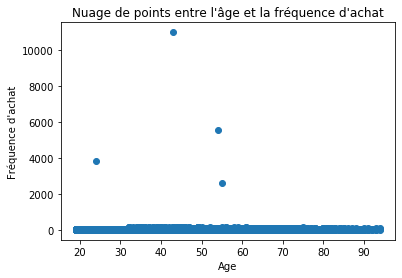

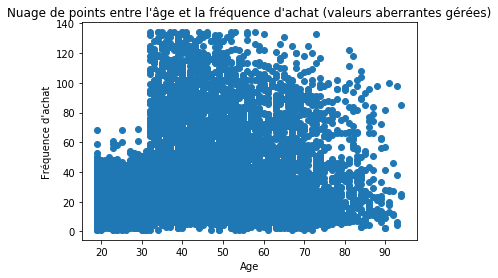

Test de Kolmogorov-Smirnov pour l'âge : 0.0645, p-value : 0.0000
Test de Kolmogorov-Smirnov pour la fréquence d'achat : 0.1497, p-value : 0.0000


In [28]:
# Observons le lien entre l'âge et la fréquence d'achats

df = complete

# Calcul de la fréquence d'achat et de l'âge pour chaque client
clients_freq_age = df.groupby('client_id').agg({'session_id': 'nunique', 'age': 'first'}).reset_index()
clients_freq_age = clients_freq_age.rename(columns={'session_id': 'frequency'})

# Nuage de points pour observer le lien entre l'âge et la fréquence d'achat
plt.scatter(clients_freq_age['age'], clients_freq_age['frequency'])
plt.xlabel('Age')
plt.ylabel('Fréquence d\'achat')
plt.title('Nuage de points entre l\'âge et la fréquence d\'achat')
plt.show()

# Gestion des valeurs aberrantes
q99 = clients_freq_age['frequency'].quantile(0.99)
clients_freq_age_filtered = clients_freq_age[clients_freq_age['frequency'] <= q99]

# Nuage de points pour observer le lien entre l'âge et la fréquence d'achat, avec gestion des valeurs aberrantes
plt.scatter(clients_freq_age_filtered['age'], clients_freq_age_filtered['frequency'])
plt.xlabel('Age')
plt.ylabel('Fréquence d\'achat')
plt.title('Nuage de points entre l\'âge et la fréquence d\'achat (valeurs aberrantes gérées)')
plt.show()

# Standardisation des variables âge et fréquence d'achat
age_zscore = stats.zscore(clients_freq_age_filtered['age'])
frequency_zscore = stats.zscore(clients_freq_age_filtered['frequency'])

# Test de Kolmogorov-Smirnov pour vérifier les conditions d'application d'un test paramétrique
ks_stat_age, ks_p_value_age = stats.kstest(age_zscore, 'norm')
ks_stat_frequency, ks_p_value_frequency = stats.kstest(frequency_zscore, 'norm')

print(f"Test de Kolmogorov-Smirnov pour l'âge : {ks_stat_age:.4f}, p-value : {ks_p_value_age:.4f}")
print(f"Test de Kolmogorov-Smirnov pour la fréquence d'achat : {ks_stat_frequency:.4f}, p-value : {ks_p_value_frequency:.4f}")

Même conclusion pour les conditions d'applications du test paramétrique que les 2 variables (âge et montant total des achats).
Ici, l'âge et la fréquence ne sont pas distribués de façon normale, un test de Spearman sera donc effectué.

In [29]:
# Test de Spearman sur l'âge et la fréquence d'âchats

# Calcul du rang pour chaque variable
clients_freq_age['age_rank'] = clients_freq_age['age'].rank()
clients_freq_age['frequency_rank'] = clients_freq_age['frequency'].rank()

# Calcul du coefficient de corrélation de Spearman
spearman_coefficient, spearman_p_value = stats.spearmanr(clients_freq_age['age_rank'], clients_freq_age['frequency_rank'])

print(f"Corrélation de Spearman : {spearman_coefficient:.4f}")
print(f"Valeur p : {spearman_p_value:.4f}")

Corrélation de Spearman : 0.2121
Valeur p : 0.0000


Le test de Spearman a révélé une corrélation positive modérée (0.2121) entre l'âge des clients et leur fréquence d'achat, ce qui indique que lorsque l'âge des clients augmente, leur fréquence d'achat tend également à augmenter. La valeur-p très faible (< 0.0001) montre que cette corrélation est statistiquement significative. Cependant, il est crucial de noter que cette corrélation n'implique pas nécessairement une relation de cause à effet entre les variables, mais plutôt une association entre elles.

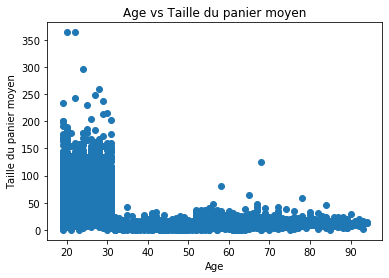

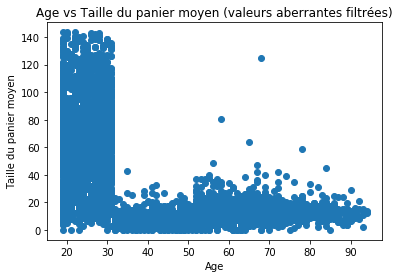

Test de Kolmogorov-Smirnov pour l'âge : 0.0620, p-value : 0.0000
Test de Kolmogorov-Smirnov pour la taille du panier moyen : 0.3008, p-value : 0.0000


In [33]:
# Observons le lien en l'âge et la taille de panier moyen 

df= complete

# Calcul du chiffre d'affaires et du nombre de transactions par client
clients_revenue_transactions = df.groupby('client_id').agg({'revenue': 'sum', 'session_id': 'count', 'age': 'mean'}).reset_index()

# Calcul de la taille du panier moyen pour chaque client
clients_revenue_transactions['basket_size'] = clients_revenue_transactions['revenue'] / clients_revenue_transactions['session_id']

# Nuage de points Age vs Basket Size
plt.scatter(clients_revenue_transactions['age'], clients_revenue_transactions['basket_size'])
plt.xlabel('Age')
plt.ylabel('Taille du panier moyen')
plt.title('Age vs Taille du panier moyen')
plt.show()

# Gestion des valeurs aberrantes
q99_basket_size = clients_revenue_transactions['basket_size'].quantile(0.99)
clients_basket_filtered = clients_revenue_transactions[clients_revenue_transactions['basket_size'] <= q99_basket_size]

# Nuage de points Age vs Basket Size filtré
plt.scatter(clients_basket_filtered['age'], clients_basket_filtered['basket_size'])
plt.xlabel('Age')
plt.ylabel('Taille du panier moyen')
plt.title('Age vs Taille du panier moyen (valeurs aberrantes filtrées)')
plt.show()

# Calcul des z-scores pour l'âge et la taille du panier moyen
age_zscore_filtered = stats.zscore(clients_basket_filtered['age'])
basket_size_zscore_filtered = stats.zscore(clients_basket_filtered['basket_size'])

# Test de Kolmogorov-Smirnov pour vérifier les conditions d'application d'un test paramétrique
ks_stat_age_filtered, ks_p_value_age_filtered = stats.kstest(age_zscore_filtered, 'norm')
ks_stat_basket_size_filtered, ks_p_value_basket_size_filtered = stats.kstest(basket_size_zscore_filtered, 'norm')

print(f"Test de Kolmogorov-Smirnov pour l'âge : {ks_stat_age_filtered:.4f}, p-value : {ks_p_value_age_filtered:.4f}")
print(f"Test de Kolmogorov-Smirnov pour la taille du panier moyen : {ks_stat_basket_size_filtered:.4f}, p-value : {ks_p_value_basket_size_filtered:.4f}")


Encore une fois, les résultats montrent que la distribution de ces variables n'est pas normale.
Un Test de Spearman sera effectué.

In [35]:
# Test de Spearman sur l'âge et la taille du panier moyen

# Calcul de la corrélation de Spearman et de la p-value associée
spearman_corr, spearman_pval = stats.spearmanr(clients_basket_filtered['age'], clients_basket_filtered['basket_size'])
print(f"Corrélation de Spearman : {spearman_corr:.4f}, p-value : {spearman_pval:.4f}")


Corrélation de Spearman : -0.2828, p-value : 0.0000


Le coefficient de corrélation de Spearman entre l'âge et la taille moyenne du panier est de -0,2828, ce qui indique une corrélation négative modérée. Cela signifie que, en général, les clients plus âgés ont tendance à avoir des tailles de panier moyennes plus petites que les clients plus jeunes.

La p-value associée est très faible (<0.0000), ce qui indique que cette corrélation est statistiquement significative, c'est-à-dire qu'il est très peu probable que la corrélation observée se soit produite par hasard. Nous pouvons donc rejeter l'hypothèse nulle selon laquelle il n'y a pas de corrélation entre l'âge et la taille moyenne du panier.

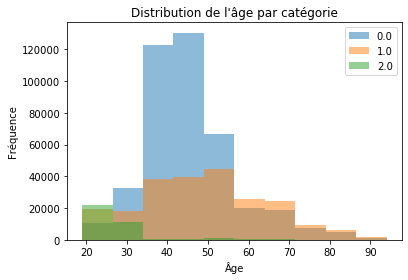

Catégorie 0.0: KS stat = 1.0, p-value = 0.0
Catégorie 1.0: KS stat = 1.0, p-value = 0.0
Catégorie 2.0: KS stat = 1.0, p-value = 0.0
Levene test: F = 44019.5365332356, p-value = 0.0
Kruskal-Wallis: H = 79346.09938564085, p-value = 0.0


In [36]:
# Observons le lien en l'âge et la catégorie de livres achetés

df = complete 

# Diagramme en barre pour voir la distribution de l'âge par catégorie
df.groupby('categ')['age'].plot(kind='hist', alpha=0.5, legend=True)
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.title('Distribution de l\'âge par catégorie')
plt.show()

# Test de Kolmogorov-Smirnov pour vérifier si l'âge est normalement distribuée dans chaque catégorie
ks_stats = []
ks_p_values = []
for cat in df['categ'].unique():
    age_in_cat = df[df['categ'] == cat]['age']
    ks_stat, ks_p_value = stats.kstest(age_in_cat, 'norm')
    ks_stats.append(ks_stat)
    ks_p_values.append(ks_p_value)
    print(f"Catégorie {cat}: KS stat = {ks_stat}, p-value = {ks_p_value}")

# Test de Levene pour vérifier l'égalité des variances dans chaque catégorie
levene_stat, levene_p_value = stats.levene(df[df['categ'] == 0.0]['age'], df[df['categ'] == 1.0]['age'])
print(f"Levene test: F = {levene_stat}, p-value = {levene_p_value}")

# Si l'âge est normalement distribué et que l'égalité des variances est vérifiée
if all(p_value > 0.05 for p_value in ks_p_values) and levene_p_value > 0.05:
    # Test d'ANOVA pour comparer les moyennes des groupes
    anova_stat, anova_p_value = stats.f_oneway(df[df['categ'] == 0.0]['age'], df[df['categ'] == 1.0]['age'], df[df['categ'] == 2.0]['age'])
    print(f"ANOVA: F = {anova_stat}, p-value = {anova_p_value}")
    
# Sinon, appliquer une version non paramétrique : le test de Kruskal-Wallis
else:
    kruskal_stat, kruskal_p_value = stats.kruskal(df[df['categ'] == 0.0]['age'], df[df['categ'] == 1.0]['age'], df[df['categ'] == 2.0]['age'])
    print(f"Kruskal-Wallis: H = {kruskal_stat}, p-value = {kruskal_p_value}")



Les résultats montrent que les données ne suivent pas une distribution normale dans chaque catégorie de livre, car les valeurs de p pour les tests de Kolmogorov-Smirnov sont inférieures à 0,05. Cela signifie que nous ne pouvons pas appliquer l'ANOVA, qui suppose que les données sont normalement distribuées dans chaque groupe.

Le test de Levene montre que les variances des âges dans chaque groupe ne sont pas égales, car la valeur de p est inférieure à 0,05. Cela signifie que nous ne pouvons pas appliquer l'ANOVA qui suppose que les variances sont égales.

Par conséquent, nous devons utiliser un test non paramétrique pour comparer les moyennes des âges dans chaque groupe. Le test de Kruskal-Wallis est un test non paramétrique qui ne suppose pas de distribution spécifique des données. Le résultat montre que la différence entre les moyennes d'âge dans chaque groupe est significative, car la valeur de p est inférieure à 0,05. Cela signifie qu'il y a une différence significative d'âge entre les clients qui achètent des livres dans différentes catégories.

## Conclusion 

L'objectif pour Lapage serait de redresser le chiffre d'affaires pour l'année 2023 afin de retrouver les chiffres de 2022.
Pour se faire, il existe plusieurs pistes à explorer : 
- fidéliser les plus jeunes (15-30 ans) pour qu'ils achètent toujours autant mais plus souvent dans l'année
- augmenter le panier moyen des acheteurs les plus récurents (40-45 ans) 
- promouvoir les best-sellers
- tenter de séduire une clientèle plus agée en mettant en place des offres spéciales